# 期末作业——LendingClub贷款逾期预测

## 1.项目介绍

LendingClub是美国一家民间贷款机构，本项目对根据LendingClub在 Kaggle 和 Udacity上提供的贷款数据进行了数据清洗，整理了19万条贷款数据。要求大家搭建 **机器学习模型** ，进行是否会 **逾期** 进行 **预测**。

## 2.项目完成要求


* 1.项目中要**有完整的机器学习流程**，**至少要包括数据导入，数据预处理，模型建立，模型训练，模型评估，模型使用6个部分，模型使用部分对submission文件中的数据进行预测**。其他部分可以自由添加。**有数据可视化内容是加分项**。
* 2.模型评估必须包含模型的**准确率，精度，召回率,f1得分和f3得分五个指标**

## 3.数据集介绍

数据已经上传钉钉群，文件名为loan2021.csv。

数据集中的数据一共有51个字段。每个字段的含义如下

| 序号| 列名  |  含义   |     
|---| ----  |---|
|1| id |  贷款记录id  |
|2| member_id |  用户id  |
|3| loan_amnt |  贷款申请人的计划申请的金额  |
|4| funded_amnt |  向贷款机构提交申请的金额  |
|5| funded_amnt_inv |  批准发放的贷款金额  |
|6| term |  还款期限（只有36个月和60个月两种）  |
|7| int_rate |  贷款利率  |
|8| installment |  每个月的还款金额  |
|9| grade |  信用评级  |
|10| sub_grade |  信用评级的子评级 |
|11| emp_title |  贷款申请人职位 |
| 12  | emp_length |  贷款申请人的工作年限  |
| 13  | home_ownership |  贷款申请人提供的房屋所有权状态。包括：出租，自有，按揭，其他。  |
| 14  | annual_inc |  贷款申请人的年收入  |
| 15 | verification_status |  共同借款人的联合收入是否经过LC验证，包括核实，未经核实，收入来源核实三种情况  |
| 16  | issue_d |  贷款发放到2016年2月之间的总的月份数  |
| 17  | **loan_status** |  **贷款是否逾期，0 代表没有逾期 ，1 代表逾期**  |
| 18  | pymnt_plan |是否安排支付计划|
| 19  | url |个人主页链接|
| 20  | purpose |  贷款目的，一共14种类型|
| 21  | title |  贷款说明的标题|
|22|zip_code|贷款人的邮编｜
|23|addr_state|贷款人居住地所在州｜
| 24  | dti |  总债务偿还总额除以借款人自我报告的月收入计算的比率 |
| 25  | delinq_2yrs |  过去两年借款人信用档案中逾期30天以上的拖欠事件的个数  |
| 26  | earliest_cr_line |  从贷款申请人最早的信贷报告开始到2016年2月之间总的月份数  |
| 27  | inq_last_6mths |  过去6个月的信用记录查询次数  |
| 28  | open_acc |  贷款申请人信用档案中的未还款的信用额度  |
| 29  | pub_rec |  贷款申请人贬损公共财务被记录的数量  |
| 30  | revol_bal |  总信贷周转余额  |
| 31  | revol_util |  循环利用率，或借款人相对于所有可用循环信贷使用的信贷额度。  |
| 32  | total_acc |  借款人信用档案中当前信用额度的总数  |
| 33  | initial_list_status |  贷款的初始上市状态  |
| 34  | out_prncp |  剩余的未偿还本金  |
| 35  | out_prncp_inv |  剩余的未偿还本金中用于投资者资助的总金额的一部分  |
| 36  | total_pymnt |  到目前为止收到的还款总额  |
| 37  | total_pymnt_inv |  已收到投资者资助的部分总金额  |
| 38  | total_rec_prncp |  到目前为止收到的总的本金  |
| 39  | total_rec_int |  到目前为止收到的利息  |
| 40  | total_rec_late_fee |  到目前为止收到的滞纳金  |
| 41  | recoveries |  收取总回收费用  |
| 42  | collection_recovery_fee |  收取总的手续费  |
| 43  | last_pymnt_d |  上个月收到的还款  |
| 44  | last_pymnt_amnt |  上次收到的总还款金额  |
| 45  | last_credit_pull_d |  最后一次放款到2016年2月中间的月份数  |
| 46  | collections_12_mths_ex_med |  除医疗债务外12个月的债务的数量  |
| 47  | acc_now_delinq |  借款人现在欠款的账户数量  |
| 48  |application_type|  贷款类型,共两种个人贷款和联合贷款 |
| 49  | tot_coll_amt |  欠款总额  |
| 50  | tot_cur_bal |  当前所有账户的余额  |
| 51  | total_rev_hi_lim|  总循环高信用/信用额度  |

---

# 数据导入

In [1]:
#导入数据处理包
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')  
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline
import missingno as msno

#忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
#读取数据
data = pd.read_csv('loan2021.csv', encoding='latin-1')
data_test =pd.read_csv('submissin.csv', encoding='latin-1')

In [3]:
#查看表格默认前5行
#data.head() 
data_test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,28532474,31055589,11000.00000,11000.00000,11000.00000,36 months,12.49000,367.94000,B,B5,...,0.00000,Oct-2015,8164.91000,Oct-2015,0.00000,INDIVIDUAL,0.00000,590.00000,192641.00000,25700.00000
1,5895314,7357454,16000.00000,16000.00000,16000.00000,60 months,15.88000,388.07000,C,C4,...,0.00000,Oct-2014,13485.63000,Oct-2014,0.00000,INDIVIDUAL,0.00000,0.00000,10212.00000,22800.00000
2,33180781,35824045,18000.00000,18000.00000,18000.00000,60 months,23.43000,511.89000,F,F1,...,0.00000,Mar-2015,17851.09000,Feb-2015,0.00000,INDIVIDUAL,0.00000,434.00000,1234441.00000,78200.00000
3,13008745,15040917,12000.00000,12000.00000,12000.00000,60 months,14.64000,283.22000,C,C3,...,0.00000,Aug-2015,9830.89000,Sep-2015,0.00000,INDIVIDUAL,0.00000,0.00000,26201.00000,31500.00000
4,6876175,8498272,18000.00000,18000.00000,18000.00000,60 months,17.56000,452.79000,D,D1,...,0.00000,Sep-2014,15988.36000,Jan-2016,0.00000,INDIVIDUAL,0.00000,0.00000,171418.00000,16100.00000


# 数据预处理

In [4]:
#统计每列属性缺失值的比例
check_null = data.isnull().sum(axis=1).sort_values(ascending=False)/float(len(data)) 
# 查看缺失比例大于0的属性
print(check_null[check_null > 0])

Series([], dtype: float64)


In [5]:
#查看数据维度
#data.shape
data_test.shape

(2000, 50)

In [6]:
#数据过滤
objectColumns = data.select_dtypes(include=["object"]).columns
var = data[objectColumns].columns
#for v in var:
#    print('\nFrequency count for variable {0}'.format(v))
#    print(data[v].value_counts())

In [7]:
drop_list = ['sub_grade', 'emp_title',  'title', 'zip_code', 'addr_state', 'id','member_id',
            'initial_list_status','title','issue_d','last_pymnt_d','last_pymnt_amnt',
             'last_credit_pull_d','collection_recovery_fee', 'earliest_cr_line','url','pymnt_plan']
data.drop(drop_list, axis=1, inplace = True)
data_test.drop(drop_list, axis=1, inplace = True)

In [8]:
#查看object数据维度
data.select_dtypes(include = ['object']).shape
#data_test.select_dtypes(include = ['object']).shape

(196234, 7)

In [9]:
#再次概览数据
data.select_dtypes(include = ['object']).head()
#data_test.select_dtypes(include = ['object']).head()

,term,grade,emp_length,home_ownership,verification_status,purpose,application_type
0,36 months,B,10+ years,RENT,Source Verified,debt_consolidation,INDIVIDUAL
1,36 months,B,10+ years,RENT,Verified,debt_consolidation,INDIVIDUAL
2,36 months,A,5 years,MORTGAGE,Source Verified,debt_consolidation,INDIVIDUAL
3,36 months,B,10+ years,MORTGAGE,Verified,credit_card,INDIVIDUAL
4,36 months,B,2 years,MORTGAGE,Not Verified,debt_consolidation,INDIVIDUAL


### 特征工程

In [10]:
data['installment_feat'] = data['installment'] / (data['annual_inc'] / 12)
data_test['installment_feat'] = data_test['installment'] / (data_test['annual_inc'] / 12)

In [11]:
#使用Pandas replace函数定义新函数：

def coding(col, codeDict):

    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)

    return colCoded

#把贷款状态LoanStatus编码为违约=1, 正常=0:

pd.value_counts(data["loan_status"])

data["loan_status"] = coding(data["loan_status"], {'Current':0,'Fully Paid':0,'In Grace Period':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1})

print( '\nAfter Coding:')

pd.value_counts(data["loan_status"])


After Coding:


0    145533
1     50701
Name: loan_status, dtype: int64

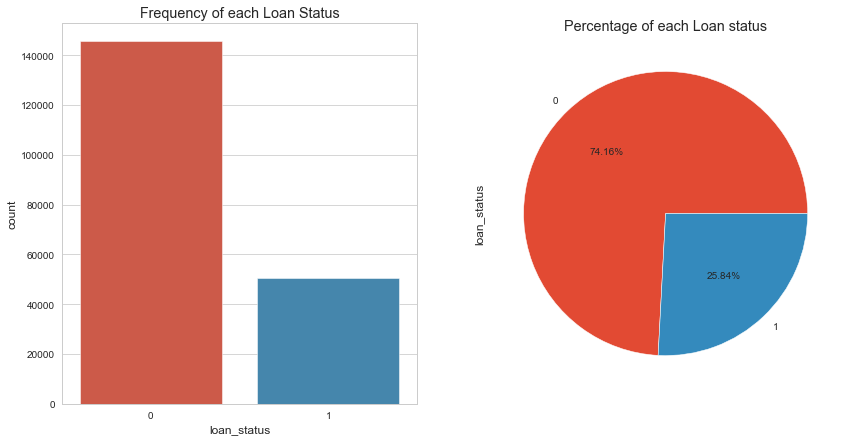

In [12]:
# 训练集贷款状态分布可视化
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=data,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
data['loan_status'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [13]:
#平台贷款发生违约的数量占少数。贷款正常状态占比为74.16%。

In [14]:
object_columns_df =data.select_dtypes(include=["object"]) #筛选数据类型为object的变量
print(object_columns_df.iloc[0])

term                            36 months
grade                                   B
emp_length                      10+ years
home_ownership                       RENT
verification_status       Source Verified
purpose                debt_consolidation
application_type               INDIVIDUAL
Name: 0, dtype: object


In [15]:
# 再次检查数据
data.select_dtypes(include=["object"]).describe().T 

,count,unique,top,freq
term,196234,2,36 months,146560
grade,196234,7,B,55575
emp_length,196234,11,10+ years,66356
home_ownership,196234,6,MORTGAGE,99542
verification_status,196234,3,Verified,71006
purpose,196234,13,debt_consolidation,122179
application_type,196234,2,INDIVIDUAL,196232


In [16]:
# 构建mapping，对有序变量"emp_length”、“grade”进行转换
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

data = data.replace(mapping_dict) #变量映射
data_test = data_test.replace(mapping_dict) #变量映射
data[['emp_length','grade']].head() #查看效果

,emp_length,grade
0,10,2
1,10,2
2,5,1
3,10,2
4,2,2


In [17]:
#对多值无序变量进行独热编码（one-hot encoding）
n_columns = ["home_ownership", "verification_status", "application_type","purpose", "term"] 
# 用get_dummies进行one hot编码
dummy_df = pd.get_dummies(data[n_columns])
dummy_df_test = pd.get_dummies(data_test[n_columns])
#当axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表合并
data = pd.concat([data, dummy_df], axis=1) 
data_test = pd.concat([data_test, dummy_df_test], axis=1) 

In [18]:
#筛选包含home_ownership的所有变量
#data.loc[:,data.columns.str.contains("home_ownership")].head() 

In [19]:
#清除原来的分类变量
data = data.drop(n_columns, axis=1)  
data_test = data_test.drop(n_columns, axis=1)  

In [20]:
#查看数据信息
data.info() 
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196234 entries, 0 to 196233
Data columns (total 57 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            196234 non-null  float64
 1   funded_amnt                          196234 non-null  float64
 2   funded_amnt_inv                      196234 non-null  float64
 3   int_rate                             196234 non-null  float64
 4   installment                          196234 non-null  float64
 5   grade                                196234 non-null  int64  
 6   emp_length                           196234 non-null  int64  
 7   annual_inc                           196234 non-null  float64
 8   loan_status                          196234 non-null  int64  
 9   dti                                  196234 non-null  float64
 10  delinq_2yrs                          196234 non-null  float64
 11  inq_last_6mth

In [21]:
#特征缩放常用的方法：归一化（normalization）和标准化（standardization）
#训练集合的标准化
col = data.select_dtypes(include=['int64','float64']).columns
#剔除目标变量
col = col.drop('loan_status') 
# 复制数据至变量loans_ml_df
loans_ml_df = data 

# 导入模块
from sklearn.preprocessing import StandardScaler
# 初始化缩放器
sc =StandardScaler() 
#对数据进行标准化
loans_ml_df[col] =sc.fit_transform(loans_ml_df[col]) 
#查看经标准化后的数据
loans_ml_df.head() 


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,-0.29787,-0.29787,-0.29716,-0.19210,-0.15273,-0.71465,1.09802,-0.56719,0,-0.07317,...,0,0,0,0,0,0,0,0,1,0
1,-1.38826,-1.38826,-1.38800,-0.34476,-1.39298,-0.71465,1.09802,-0.81286,0,0.90153,...,0,0,0,0,0,0,0,0,1,0
2,1.64061,1.64061,1.64213,-1.51896,1.72919,-1.46097,-0.28166,4.10065,0,0.12958,...,0,0,0,0,0,0,0,0,1,0
3,1.15599,1.15599,1.15731,-0.19210,1.49565,-0.71465,1.09802,0.41552,0,0.58670,...,0,0,0,0,0,0,0,0,1,0
4,-0.78249,-0.78249,-0.78198,-0.76236,-0.74152,-0.71465,-1.10947,-0.68184,1,-0.22302,...,0,0,0,0,0,0,0,0,1,0


In [22]:
#训练集合的标准化
col_test = data_test.select_dtypes(include=['int64','float64']).columns
 
# 复制数据至变量loans_ml_df
loans_ml_df_test = data_test 

# 导入模块
from sklearn.preprocessing import StandardScaler
# 初始化缩放器
sc =StandardScaler() 
#对数据进行标准化
loans_ml_df_test[col] =sc.fit_transform(loans_ml_df_test[col]) 
#查看经标准化后的数据
loans_ml_df_test.head() 

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,-0.46894,-0.46894,-0.46835,-0.58646,-0.35332,-0.86513,0.01018,-0.12288,-0.30544,-0.34340,...,0,0,0,0,0,0,0,0,1,0
1,0.14221,0.14221,0.14307,0.17578,-0.27065,-0.13104,-0.81490,0.00514,-1.81766,0.82067,...,0,0,0,0,0,0,0,0,0,1
2,0.38667,0.38667,0.38764,1.87340,0.23788,2.07125,-1.36495,1.24984,-1.77642,0.82067,...,0,0,0,0,0,0,0,0,0,1
3,-0.34671,-0.34671,-0.34607,-0.10303,-0.70127,-0.13104,-1.63998,-0.20823,-0.14422,-0.34340,...,0,0,0,1,0,0,0,0,0,1
4,0.38667,0.38667,0.38764,0.55353,-0.00484,0.60306,1.11028,-0.13669,0.78685,-0.34340,...,0,0,0,0,0,0,0,0,0,1


In [23]:
#特征选择:构建X特征变量和Y目标变量
#训练集
x_feature = list(loans_ml_df.columns)
x_feature.remove('loan_status')
x_val = loans_ml_df[x_feature]
y_val = loans_ml_df['loan_status']
len(x_feature) # 查看初始特征集合的数量
#x_val.info()

56

In [24]:
#测试集
x_feature = list(loans_ml_df_test.columns)

x_val_test = loans_ml_df_test[x_feature]

len(x_feature) # 查看初始特征集合的数量
#x_val_test.info()

53

In [25]:
# 初览数据
#x_val.describe().T 

# 模型建立

In [26]:
#Wrapper_选出与目标变量相关性较高的特征
#通过暴力的递归特征消除方法筛选30个与目标变量相关性最强的特征
#逐步剔除特征从而达到首次降维
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# 建立逻辑回归分类器
model = LogisticRegression()
# 建立递归特征消除筛选器
rfe = RFE(model, 30) #通过递归选择特征，选择30个特征
rfe = rfe.fit(x_val, y_val)
# 打印筛选结果
print(rfe.support_)
print(rfe.ranking_) #ranking 为 1代表被选中，其他则未被代表未被选中


[ True  True  True  True  True  True False False False False False False
 False False False False  True  True  True  True  True  True  True  True
 False False  True False False  True False  True False False  True  True
  True  True  True  True False  True False False False  True  True False
 False False False  True False  True  True  True]
[ 1  1  1  1  1  1 18 21 13 27 19  5 17 15  7 12  1  1  1  1  1  1  1  1
 24 20  1  6 16  1 26  1  2 14  1  1  1  1  1  1 25  1 23 10  9  1  1  3
  4  8 11  1 22  1  1  1]


In [27]:
#通过布尔值筛选首次降维后的变量
col_filter = x_val.columns[rfe.support_] 
#查看通过递归特征消除法筛选的变量
col_filter

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'tot_coll_amt', 'installment_feat',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'purpose_car', 'purpose_house',
       'purpose_major_purchase', 'purpose_small_business', 'purpose_wedding',
       'term_ 36 months', 'term_ 60 months'],
      dtype='object')

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

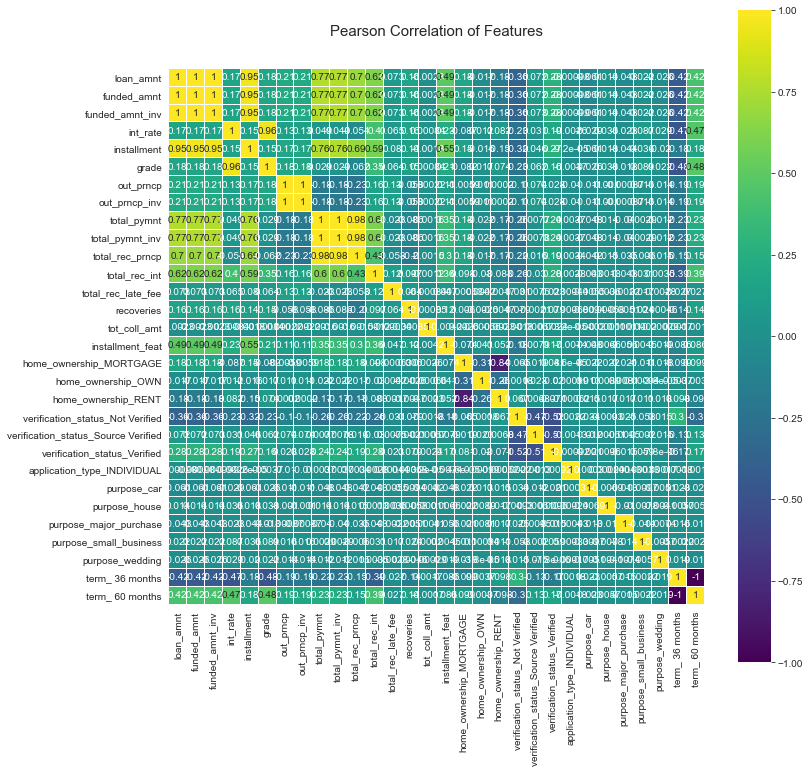

In [28]:
#通过皮尔森相关性图谱找出冗余特征并将其剔除；
#同时，可以通过相关性图谱进一步引导我们选择特征的方向。
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(loans_ml_df[col_filter].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [29]:
#删除冗余特征
drop_col = ['funded_amnt', 'funded_amnt_inv','installment', 'out_prncp', 'out_prncp_inv',
            'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'home_ownership_OWN',
            'home_ownership_RENT' ,'term_ 36 months', 'total_pymnt', 'verification_status_Source Verified','int_rate']
col_new = col_filter.drop(drop_col)
col_new # 查看剩余的特征

Index(['loan_amnt', 'grade', 'total_rec_late_fee', 'recoveries',
       'tot_coll_amt', 'installment_feat', 'home_ownership_MORTGAGE',
       'verification_status_Not Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'purpose_car', 'purpose_house',
       'purpose_major_purchase', 'purpose_small_business', 'purpose_wedding',
       'term_ 60 months'],
      dtype='object')

In [30]:
x_val_test_new=x_val_test.loc[:,['loan_amnt', 'grade', 'total_rec_late_fee', 'recoveries',
       'tot_coll_amt', 'installment_feat', 'home_ownership_MORTGAGE',
       'verification_status_Not Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'purpose_car', 'purpose_house',
       'purpose_major_purchase', 'purpose_small_business', 'purpose_wedding',
       'term_ 60 months']]
x_val_test_new

,loan_amnt,grade,total_rec_late_fee,recoveries,tot_coll_amt,installment_feat,home_ownership_MORTGAGE,verification_status_Not Verified,verification_status_Verified,application_type_INDIVIDUAL,purpose_car,purpose_house,purpose_major_purchase,purpose_small_business,purpose_wedding,term_ 60 months
0,-0.46894,-0.86513,-0.17830,-0.29156,0.92367,-0.17514,1,1,0,1,0,0,0,0,0,0
1,0.14221,-0.13104,-0.17830,-0.29156,-0.18406,-0.55945,1,0,1,1,0,0,0,0,0,1
2,0.38667,2.07125,-0.17830,-0.29156,0.63078,-1.49763,1,0,0,1,0,0,0,0,0,1
3,-0.34671,-0.13104,-0.17830,-0.29156,-0.18406,-0.22354,0,0,0,1,0,0,0,0,0,1
4,0.38667,0.60306,-0.17830,-0.29156,-0.18406,0.35555,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.76229,-0.13104,-0.17830,-0.29156,1.16587,-0.66962,1,0,1,1,0,0,0,0,0,0
1996,1.60898,-0.86513,-0.17830,-0.29156,-0.18406,1.21788,1,0,0,1,0,0,0,0,0,0
1997,-0.34671,-0.86513,6.01075,-0.29156,-0.18406,-0.52773,1,0,1,1,0,0,0,0,0,0
1998,1.20562,2.80535,-0.17830,3.73870,-0.18406,1.19298,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

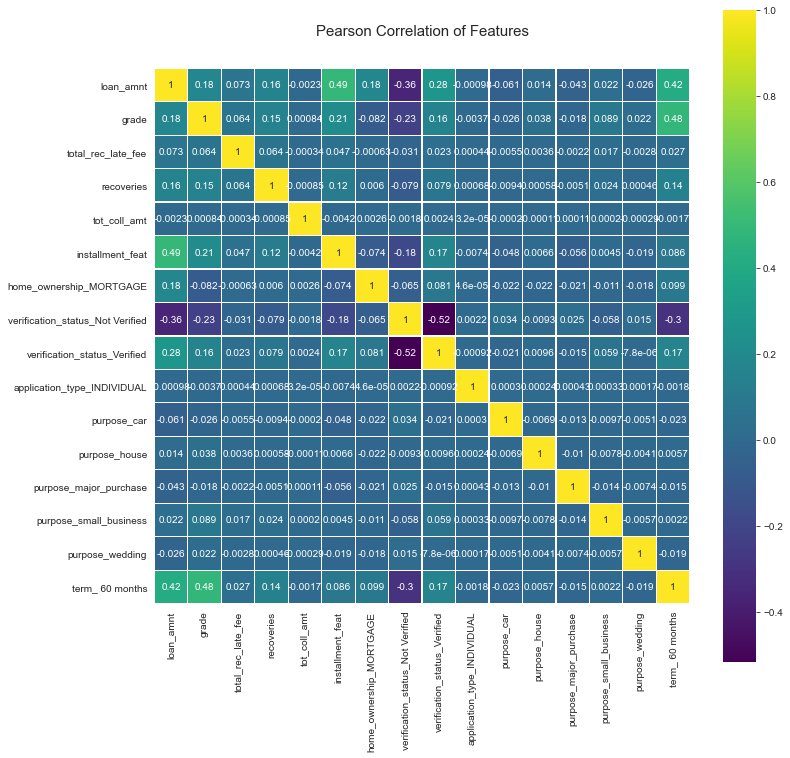

In [31]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(loans_ml_df[col_new].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [32]:
#Embedded：随机森林算法判定特征的重要性
names = loans_ml_df[col_new].columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(x_val[col_new], y_val) #对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('loan_amnt', 0.18511509085549854)
('grade', 0.042528070611135664)
('total_rec_late_fee', 0.044882233803011984)
('recoveries', 0.21959416133359774)
('tot_coll_amt', 0.04168702376595226)
('installment_feat', 0.4232514762914049)
('home_ownership_MORTGAGE', 0.00633375052263229)
('verification_status_Not Verified', 0.004901507875334255)
('verification_status_Verified', 0.005228140845019807)
('application_type_INDIVIDUAL', 1.4375486639427443e-05)
('purpose_car', 0.0013997343197782509)
('purpose_house', 0.0013829061321673425)
('purpose_major_purchase', 0.002764339427881454)
('purpose_small_business', 0.0018686543146986397)
('purpose_wedding', 0.0005876581300931862)
('term_ 60 months', 0.01846087628515433)


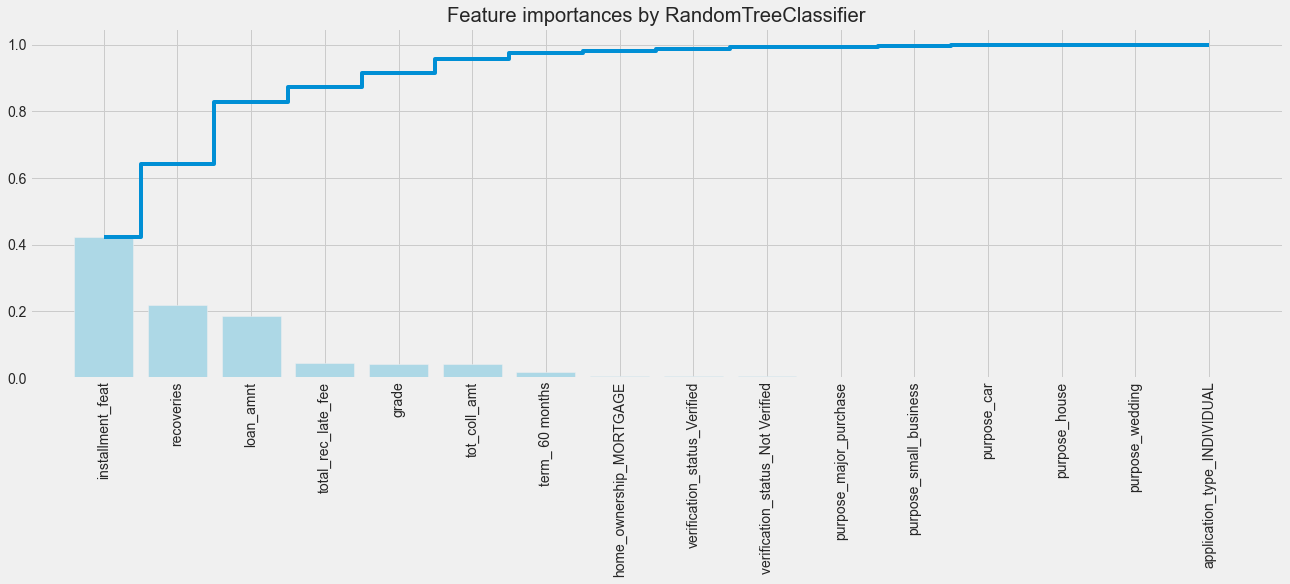

In [33]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances 可视化##
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# 模型训练

In [34]:
#理样本不平衡采用的方法是过采样
# 构建自变量和因变量
X = loans_ml_df[col_new]
y = loans_ml_df["loan_status"]

n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])

样本个数：196234; 正样本占74.16%; 负样本占25.84%
特征维数： 16


In [35]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_resample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

通过SMOTE方法平衡正负样本后
样本个数：291066; 正样本占50.00%; 负样本占50.00%


In [36]:
#构建分类器进行训练
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression() # 构建逻辑回归分类器
clf1.fit(X, y)

LogisticRegression()

In [37]:
predicted1 = clf.predict(X) # 通过分类器产生预测结果

# 模型评估

In [38]:
#查看预则结果的准确率
from sklearn.metrics import accuracy_score
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y,)))

Test set accuracy score: 0.84860


In [39]:
#混淆矩阵进一步比较。
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y, predicted1) 
m

array([[144648,    885],
       [ 43182, 102351]], dtype=int64)

In [40]:
#分别计算precision、recall、f1-score的值
from sklearn.metrics import classification_report
print(classification_report(y, predicted1))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87    145533
           1       0.99      0.70      0.82    145533

    accuracy                           0.85    291066
   macro avg       0.88      0.85      0.85    291066
weighted avg       0.88      0.85      0.85    291066



In [41]:
#计算auc
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(y, predicted1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.848601


# 模型使用

In [42]:
#训练集的数据已经被处理为x_val_test_new
#将测试集结果保存到submissinx.csv

In [43]:
y_pred = clf.predict(x_val_test_new)

y_pred =np.array(y_pred.T)
data_test['loan_status'] = y_pred
#data_test.head()
data_test.to_csv('submissinx.csv', index=None)